# Task description 

## Business context 

Deel clients may add funds to their Deel account using their credit and debit cards. Deel has
partnered with Globepay to process all of these account funding credit and debit card transactions.
Globepay is an industry-leading global payment processor and is able to process payments in
many currencies from cards domiciled in many countries.
Deel has connectivity into Globepay using their API. Deel clients provide their credit and debit
details within the Deel web application, Deel systems pass those credentials along with any
relevant transaction details to Globepay for processing.

## Problem

Deel is experiencing a decline in the acceptance rate of credit and debit card payments processed
by Globepay in the recent period. The “acceptance rate” is defined as the number of accepted transactions divided by
the total attempted transactions and the amount is
in local currency.

# Data work 

In [23]:
import pandas as pd
import json
import matplotlib.pyplot as plt

acceptance_report_path = '/Users/roman.shipovskoy/Downloads/Globepay Acceptance Report - Globepay Acceptance Report_ (1).csv'
chargeback_report_path = '/Users/roman.shipovskoy/Downloads/Globepay Chargeback Report - Globepay Chargeback Report (1).csv'

acceptance_df = pd.read_csv(acceptance_report_path, sep = ';')
chargeback_df = pd.read_csv(chargeback_report_path)


In [24]:
acceptance_df['rates'] = acceptance_df['rates'].apply(lambda x: json.loads(x) if pd.notnull(x) else {})

rates_expanded = acceptance_df['rates'].apply(pd.Series)

acceptance_df = pd.concat([acceptance_df.drop(columns=['rates']), rates_expanded], axis=1)

acceptance_df.head()

,external_ref,status,source,ref,date_time,state,cvv_provided,amount,country,currency,CAD,EUR,MXN,USD,SGD,AUD,GBP
0,nCyEIIGaP5QQ2Wqb-_Rt8,True,GLOBALPAY,evt_1ESgcCOV7fY1ChY1MkZizZt,2019-01-01T00:00:00.000Z,DECLINED,False,1020.46,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81
1,ptNiI9B7NNpK7VsMZx6zZ,True,GLOBALPAY,evt_1EBMGCEjEtianKMJaZXOx1y,2019-01-01T04:48:00.000Z,ACCEPTED,False,1582.57,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81
2,1GS5BDKBnauCt-3nHPs6x,True,GLOBALPAY,evt_1EOALu0AZqEhZBn9ub_nbcE,2019-01-01T09:36:00.000Z,DECLINED,False,1653.07,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81
3,Y_oecYz8GjBDaxmMqkkLQ,True,GLOBALPAY,evt_1ESHsWyaSPqE1mrmJ2B6rvs,2019-01-01T14:24:00.000Z,ACCEPTED,False,2228.17,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81
4,LlEs1TnKVa2xX6PH9Zsz0,True,GLOBALPAY,evt_1EjzPk13qLzmvDR_4hXuMMw,2019-01-01T19:12:00.000Z,ACCEPTED,False,2589.92,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81


I split rates column into separate columns to get easier info about different currencies 

In [25]:
acceptance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   external_ref  5430 non-null   object 
 1   status        5430 non-null   bool   
 2   source        5430 non-null   object 
 3   ref           5430 non-null   object 
 4   date_time     5430 non-null   object 
 5   state         5430 non-null   object 
 6   cvv_provided  5430 non-null   bool   
 7   amount        5430 non-null   float64
 8   country       5430 non-null   object 
 9   currency      5430 non-null   object 
 10  CAD           5430 non-null   float64
 11  EUR           5430 non-null   float64
 12  MXN           5430 non-null   float64
 13  USD           5430 non-null   float64
 14  SGD           5430 non-null   float64
 15  AUD           5430 non-null   float64
 16  GBP           5430 non-null   float64
dtypes: bool(2), float64(8), object(7)
memory usage: 647.1+ KB


In [26]:
chargeback_df.head()

,external_ref,status,source,chargeback
0,_-UTDS0dMlagMWEtQKMy-,True,GLOBALPAY,False
1,_0fqf75KiPa0iiviKCSsU,True,GLOBALPAY,False
2,_0H9Ecd_RctsLetId-p14,True,GLOBALPAY,False
3,_0wBrMzAzIhO3fQRWUcBH,True,GLOBALPAY,False
4,_25jZuGDrmwUEdAwKp1xV,True,GLOBALPAY,False


In [27]:
chargeback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   external_ref  5430 non-null   object
 1   status        5430 non-null   bool  
 2   source        5430 non-null   object
 3   chargeback    5430 non-null   bool  
dtypes: bool(2), object(2)
memory usage: 95.6+ KB


Tables look similar in size and also seem not to have missing data.

In [28]:

combined_df = acceptance_df.merge(chargeback_df, on='external_ref', how='left', suffixes=('_acceptance', '_chargeback'))


combined_df

,external_ref,status_acceptance,source_acceptance,ref,date_time,state,cvv_provided,amount,country,currency,CAD,EUR,MXN,USD,SGD,AUD,GBP,status_chargeback,source_chargeback,chargeback
0,nCyEIIGaP5QQ2Wqb-_Rt8,True,GLOBALPAY,evt_1ESgcCOV7fY1ChY1MkZizZt,2019-01-01T00:00:00.000Z,DECLINED,False,1020.46,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81,True,GLOBALPAY,False
1,ptNiI9B7NNpK7VsMZx6zZ,True,GLOBALPAY,evt_1EBMGCEjEtianKMJaZXOx1y,2019-01-01T04:48:00.000Z,ACCEPTED,False,1582.57,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81,True,GLOBALPAY,True
2,1GS5BDKBnauCt-3nHPs6x,True,GLOBALPAY,evt_1EOALu0AZqEhZBn9ub_nbcE,2019-01-01T09:36:00.000Z,DECLINED,False,1653.07,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81,True,GLOBALPAY,False
3,Y_oecYz8GjBDaxmMqkkLQ,True,GLOBALPAY,evt_1ESHsWyaSPqE1mrmJ2B6rvs,2019-01-01T14:24:00.000Z,ACCEPTED,False,2228.17,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81,True,GLOBALPAY,True
4,LlEs1TnKVa2xX6PH9Zsz0,True,GLOBALPAY,evt_1EjzPk13qLzmvDR_4hXuMMw,2019-01-01T19:12:00.000Z,ACCEPTED,False,2589.92,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81,True,GLOBALPAY,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,mej1WI86fIPr4fZStA1wx,True,GLOBALPAY,evt_1EhM7CrZvfh_Aw8H-aP-Sgu,2019-06-30T00:00:00.000Z,ACCEPTED,False,178728.10,AE,USD,1.38,0.70,25.06,1.00,1.37,1.60,0.69,True,GLOBALPAY,False
5426,bl5iBGuCq9zNpQDaCGWHP,True,GLOBALPAY,evt_1EuNMahC_lsgbRGMDHcuJdB,2019-06-30T04:48:00.000Z,DECLINED,False,179198.55,AE,USD,1.38,0.70,25.06,1.00,1.37,1.60,0.69,True,GLOBALPAY,False
5427,RPAQwH-O6cBXjzWqS7O6D,True,GLOBALPAY,evt_1EcQnLsAtP8N1mlkTN1j-A1,2019-06-30T09:36:00.000Z,ACCEPTED,False,179388.92,AE,USD,1.38,0.70,25.06,1.00,1.37,1.60,0.69,True,GLOBALPAY,False
5428,SHBEeyLOy4YKGAdYNfoXI,True,GLOBALPAY,evt_1El9nJBqeQtkSiDvhY3KrkV,2019-06-30T14:24:00.000Z,ACCEPTED,False,179982.21,AE,USD,1.38,0.70,25.06,1.00,1.37,1.60,0.69,True,GLOBALPAY,False


In [29]:
combined_df.source_acceptance.unique()

array(['GLOBALPAY'], dtype=object)

## Let's answer all questions: 

### What is the volume of declined payments in USD

In [30]:
def convert_to_usd(row):
    if row['currency'] == 'USD':
        return row['amount'] 
    elif row['currency'] == 'CAD':
        return row['amount'] / row['CAD']
    elif row['currency'] == 'EUR':
        return row['amount'] / row['EUR']
    elif row['currency'] == 'MXN':
        return row['amount'] / row['MXN']
    elif row['currency'] == 'GBP':
        return row['amount'] / row['GBP']
    else:
        return None 


combined_df['amount_in_usd'] = combined_df.apply(convert_to_usd, axis=1)





In [36]:
combined_df.head()

,external_ref,status_acceptance,source_acceptance,ref,date_time,state,cvv_provided,amount,country,currency,...,EUR,MXN,USD,SGD,AUD,GBP,status_chargeback,source_chargeback,chargeback,amount_in_usd
0,nCyEIIGaP5QQ2Wqb-_Rt8,True,GLOBALPAY,evt_1ESgcCOV7fY1ChY1MkZizZt,2019-01-01T00:00:00.000Z,DECLINED,False,1020.46,US,USD,...,0.93,25.10,1.00,1.43,1.65,0.81,True,GLOBALPAY,False,1020.46
1,ptNiI9B7NNpK7VsMZx6zZ,True,GLOBALPAY,evt_1EBMGCEjEtianKMJaZXOx1y,2019-01-01T04:48:00.000Z,ACCEPTED,False,1582.57,US,USD,...,0.93,25.10,1.00,1.43,1.65,0.81,True,GLOBALPAY,True,1582.57
2,1GS5BDKBnauCt-3nHPs6x,True,GLOBALPAY,evt_1EOALu0AZqEhZBn9ub_nbcE,2019-01-01T09:36:00.000Z,DECLINED,False,1653.07,US,USD,...,0.93,25.10,1.00,1.43,1.65,0.81,True,GLOBALPAY,False,1653.07
3,Y_oecYz8GjBDaxmMqkkLQ,True,GLOBALPAY,evt_1ESHsWyaSPqE1mrmJ2B6rvs,2019-01-01T14:24:00.000Z,ACCEPTED,False,2228.17,US,USD,...,0.93,25.10,1.00,1.43,1.65,0.81,True,GLOBALPAY,True,2228.17
4,LlEs1TnKVa2xX6PH9Zsz0,True,GLOBALPAY,evt_1EjzPk13qLzmvDR_4hXuMMw,2019-01-01T19:12:00.000Z,ACCEPTED,False,2589.92,US,USD,...,0.93,25.10,1.00,1.43,1.65,0.81,True,GLOBALPAY,True,2589.92


Total volume of declined payments in USD: $132,672,780.85


/var/folders/p7/444vgvsj4ql2sdbbgszxsj1r0000gp/T/ipykernel_23875/3898125679.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  combined_df['month_year'] = combined_df['date_time'].dt.to_period('M')
/var/folders/p7/444vgvsj4ql2sdbbgszxsj1r0000gp/T/ipykernel_23875/3898125679.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_acceptance = combined_df.groupby('month_year').apply(


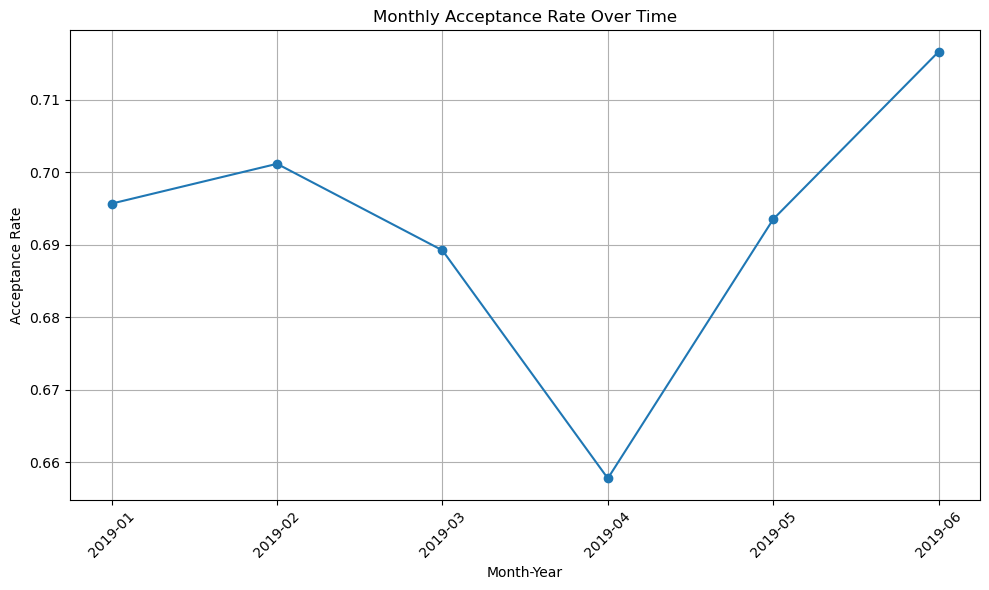

/var/folders/p7/444vgvsj4ql2sdbbgszxsj1r0000gp/T/ipykernel_23875/3898125679.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_acceptance = combined_df.groupby('country').apply(



Countries with lowest acceptance rates:
   country  acceptance_rate
5      US             0.67
0      AE             0.68
1      CA             0.69
2      FR             0.69
3      MX             0.71


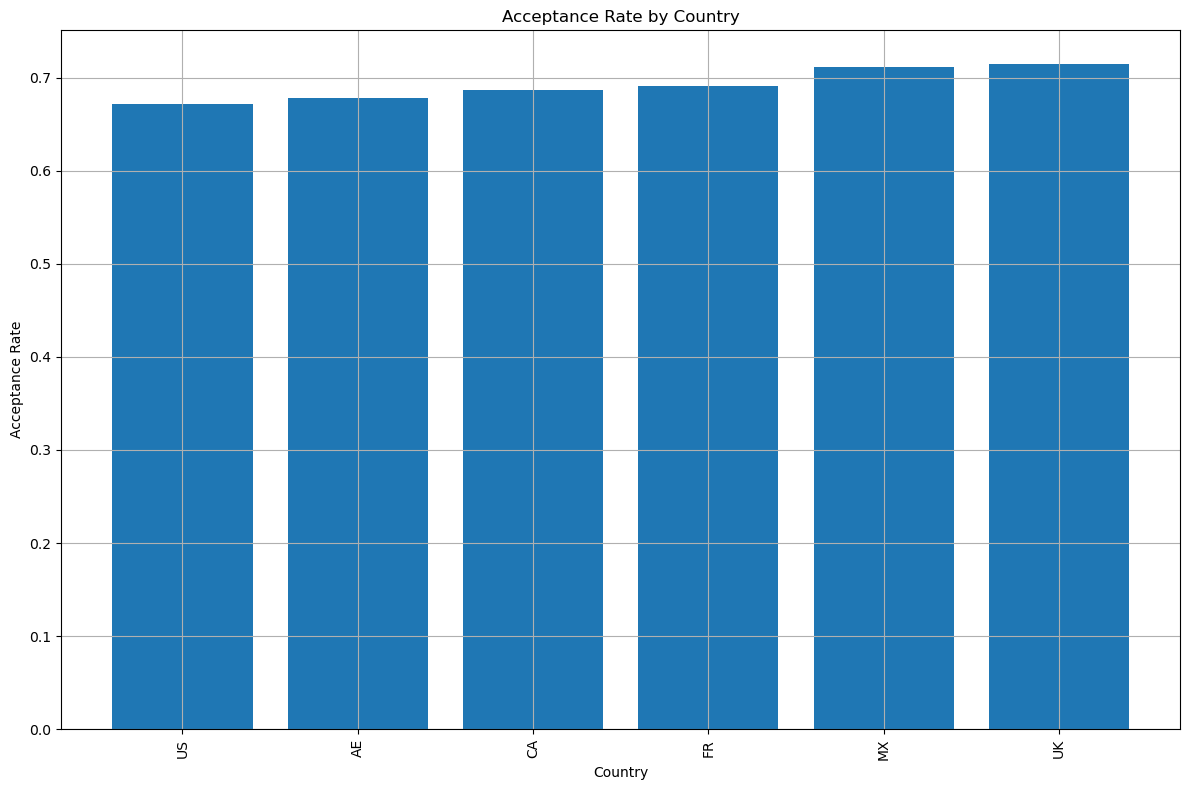

In [37]:

combined_df['date_time'] = pd.to_datetime(combined_df['date_time'], errors='coerce')
combined_df['amount_in_usd'] = pd.to_numeric(combined_df['amount_in_usd'], errors='coerce')


declined_payments_usd = combined_df[(combined_df['state'] == 'DECLINED')]
total_declined_volume_usd = declined_payments_usd['amount_in_usd'].sum()
print(f"Total volume of declined payments in USD: ${total_declined_volume_usd:,.2f}")


combined_df['month_year'] = combined_df['date_time'].dt.to_period('M')
monthly_acceptance = combined_df.groupby('month_year').apply(
    lambda x: (x['state'] == 'ACCEPTED').sum() / len(x)
).reset_index(name='acceptance_rate')


plt.figure(figsize=(10, 6))
plt.plot(monthly_acceptance['month_year'].astype(str), monthly_acceptance['acceptance_rate'], marker='o')
plt.title("Monthly Acceptance Rate Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


country_acceptance = combined_df.groupby('country').apply(
    lambda x: (x['state'] == 'ACCEPTED').sum() / len(x)
).reset_index(name='acceptance_rate')


country_acceptance = country_acceptance.sort_values(by='acceptance_rate', ascending=True)
print("\nCountries with lowest acceptance rates:\n", country_acceptance.head())


plt.figure(figsize=(12, 8))
plt.bar(country_acceptance['country'], country_acceptance['acceptance_rate'])
plt.title("Acceptance Rate by Country")
plt.xlabel("Country")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:

declined_payments_usd = combined_df[(combined_df['state'] == 'DECLINED')]

declined_by_country_month = declined_payments_usd.groupby(
    ['country', combined_df['month_year']]
)['amount_in_usd'].sum().reset_index()

# Rename columns for clarity
declined_by_country_month.columns = ['country', 'month_year', 'total_declined_volume']

# Calculate the average declined volume per country
country_avg_declined = declined_by_country_month.groupby('country')['total_declined_volume'].mean().reset_index()
country_avg_declined.columns = ['country', 'average_declined_volume']

# Merge the average volume into the main DataFrame
declined_by_country_month = declined_by_country_month.merge(country_avg_declined, on='country')

# Calculate the difference from the average in percentages
declined_by_country_month['diff_from_avg_percent'] = (
    (declined_by_country_month['total_declined_volume'] - declined_by_country_month['average_declined_volume'])
    / declined_by_country_month['average_declined_volume'] * 100
)




pd.set_option('display.float_format', '{:.2f}'.format)


declined_by_country_month



,country,month_year,total_declined_volume,average_declined_volume,diff_from_avg_percent
0,AE,2019-01,980413.67,4389192.07,-77.66
1,AE,2019-02,1975370.40,4389192.07,-54.99
2,AE,2019-03,3537487.52,4389192.07,-19.40
3,AE,2019-04,5765286.22,4389192.07,31.35
4,AE,2019-05,6778895.95,4389192.07,54.45
5,AE,2019-06,7297698.67,4389192.07,66.27
6,CA,2019-01,426577.51,3184734.28,-86.61
7,CA,2019-02,958853.31,3184734.28,-69.89
8,CA,2019-03,2426648.61,3184734.28,-23.80
9,CA,2019-04,4441845.08,3184734.28,39.47


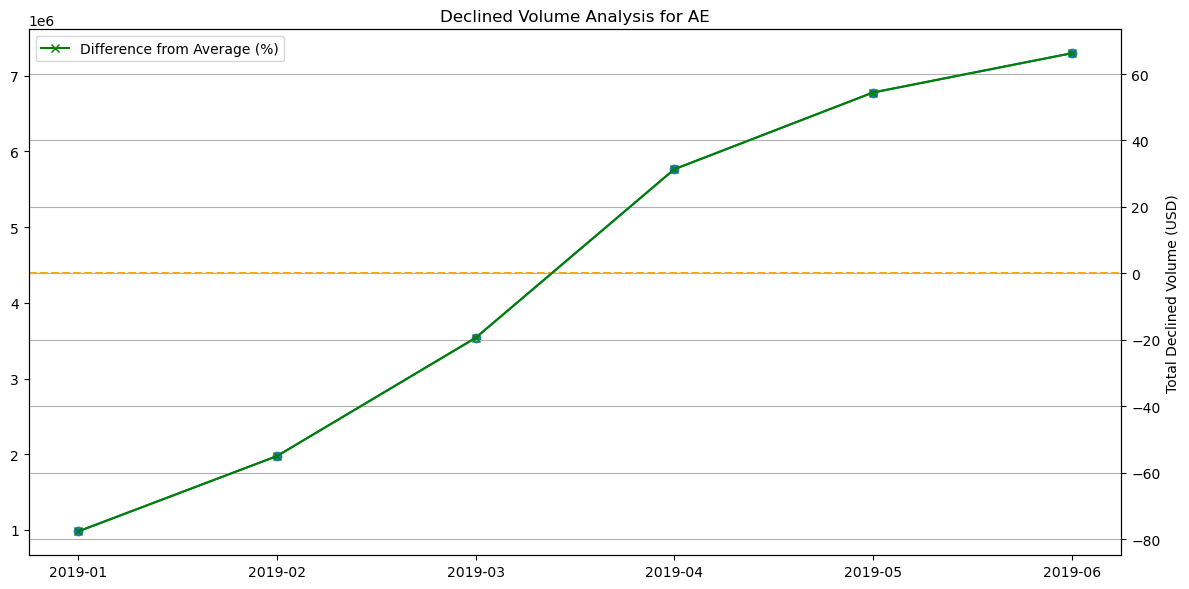

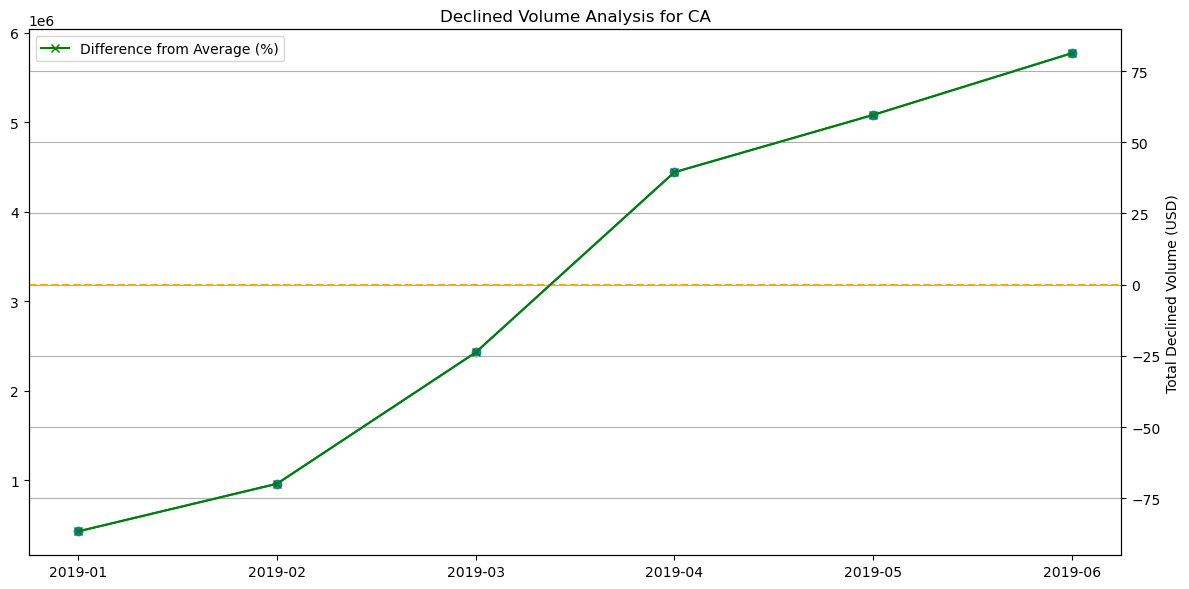

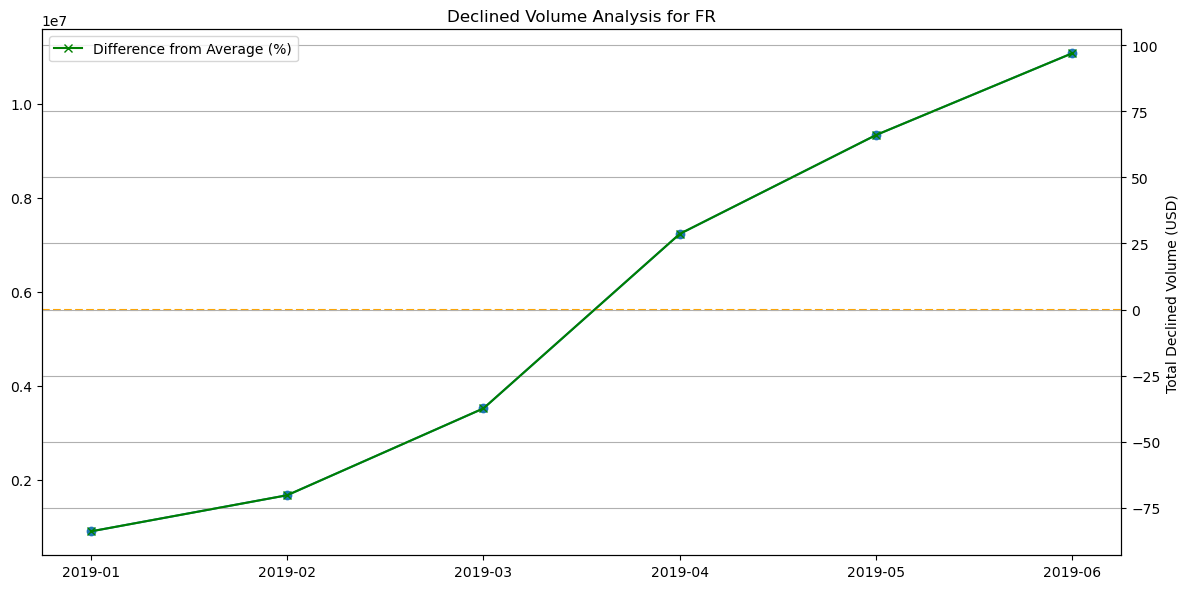

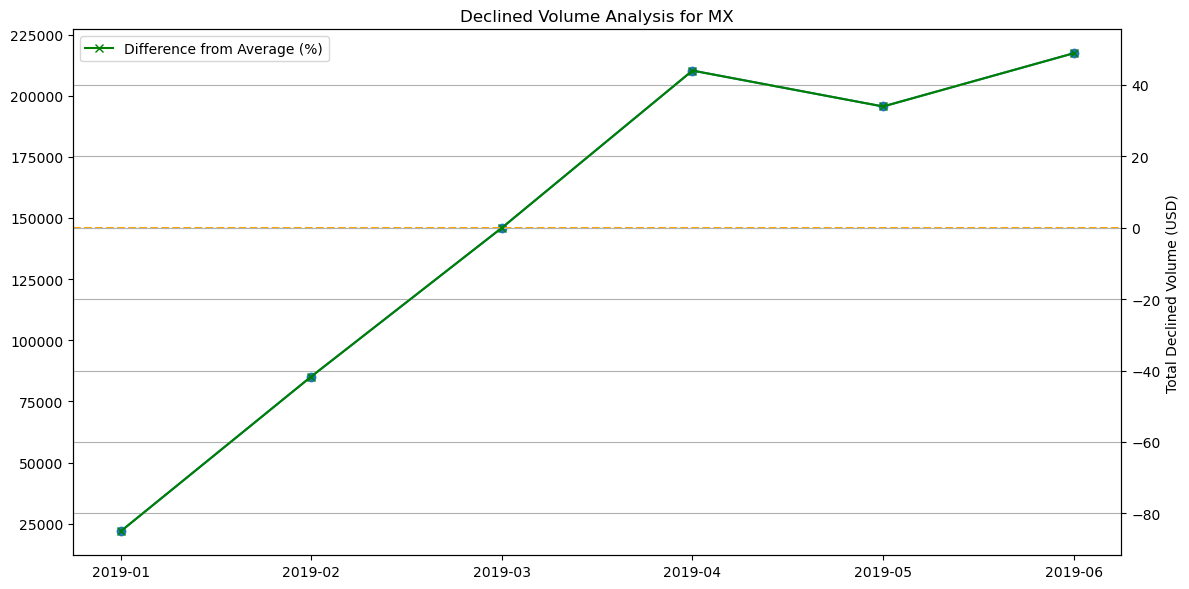

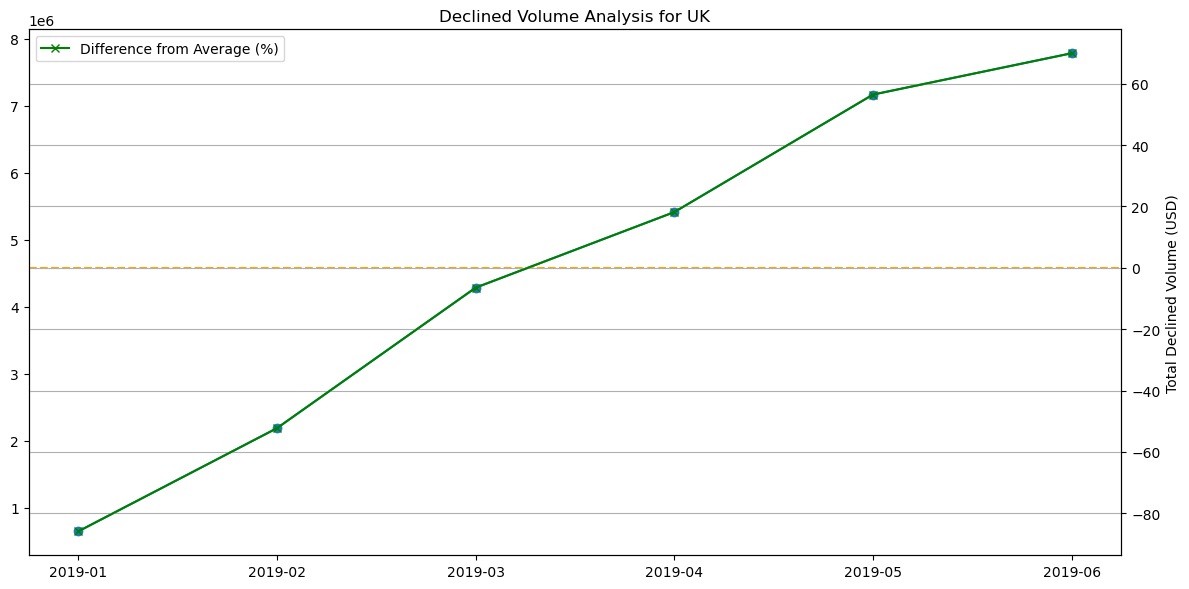

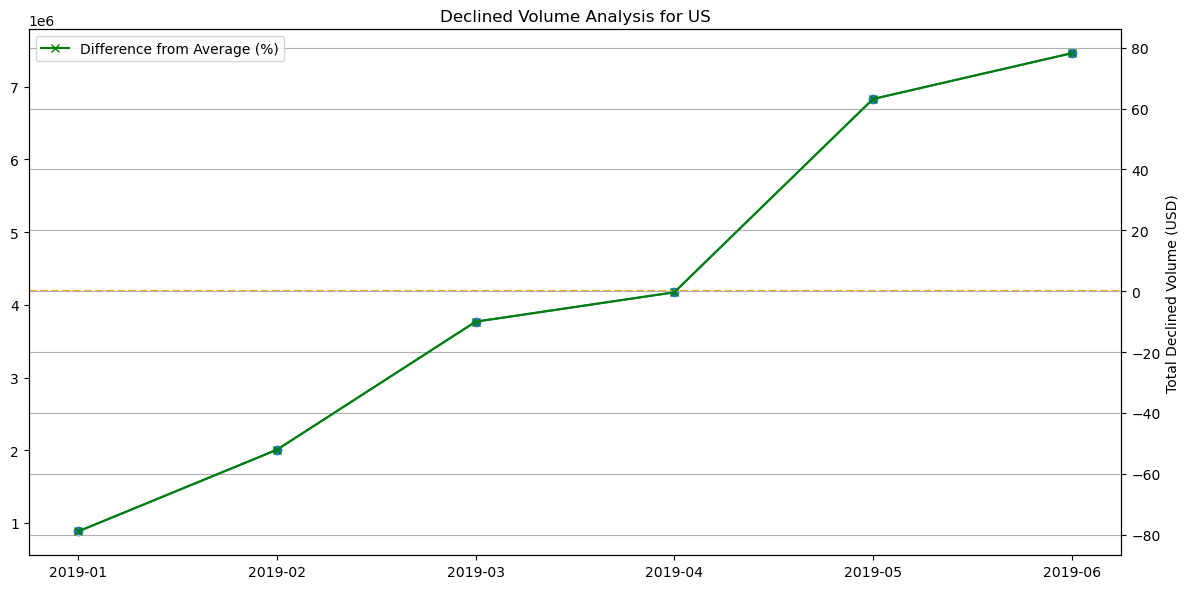

In [39]:



countries = declined_by_country_month['country'].unique()


for country in countries:

    country_data = declined_by_country_month[declined_by_country_month['country'] == country]
    
    plt.figure(figsize=(12, 6))
    
    plt.plot(country_data['month_year'].astype(str), country_data['total_declined_volume'], label="Total Declined Volume", marker='o')
    
    plt.axhline(y=country_data['average_declined_volume'].iloc[0], color='orange', linestyle='--', label="Average Declined Volume")
    
    plt.twinx()
    plt.plot(country_data['month_year'].astype(str), country_data['diff_from_avg_percent'], color='green', label="Difference from Average (%)", marker='x')
    plt.ylabel("Difference from Average (%)")
    
    plt.title(f"Declined Volume Analysis for {country}")
    plt.xlabel("Month-Year")
    plt.ylabel("Total Declined Volume (USD)")
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


In [40]:
combined_df.groupby(['month_year', 'chargeback']).external_ref.count()

month_year  chargeback
2019-01     False         707
            True          223
2019-02     False         840
2019-03     False         930
2019-04     False         900
2019-05     False         930
2019-06     False         900
Name: external_ref, dtype: int64

/var/folders/p7/444vgvsj4ql2sdbbgszxsj1r0000gp/T/ipykernel_23875/3274527061.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  combined_df['month_year'] = combined_df['date_time'].dt.to_period('M')
/var/folders/p7/444vgvsj4ql2sdbbgszxsj1r0000gp/T/ipykernel_23875/3274527061.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_acceptance = combined_df.groupby('month_year').apply(
/var/folders/p7/444vgvsj4ql2sdbbgszxsj1r0000gp/T/ipykernel_23875/3274527061.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from th

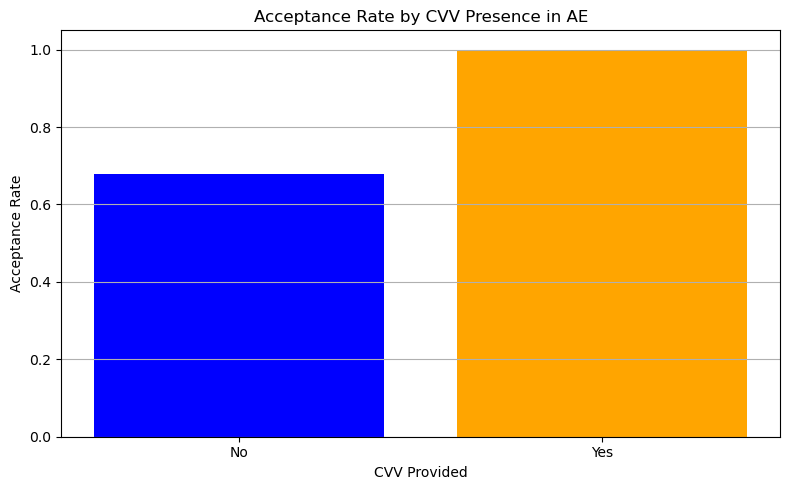

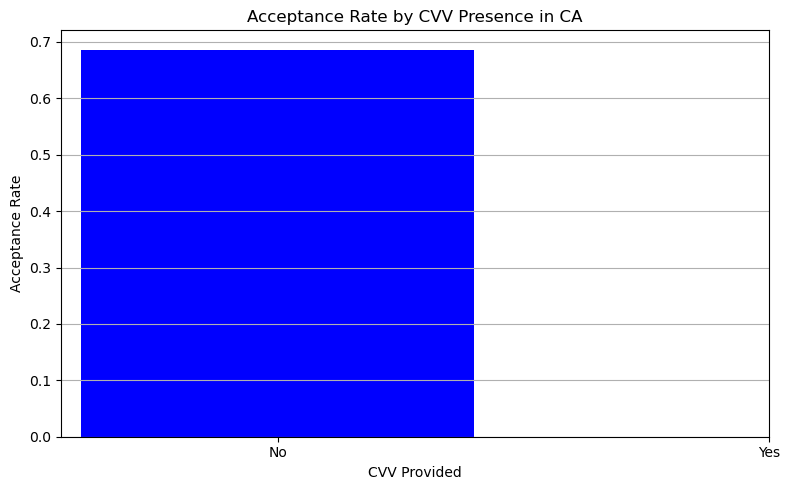

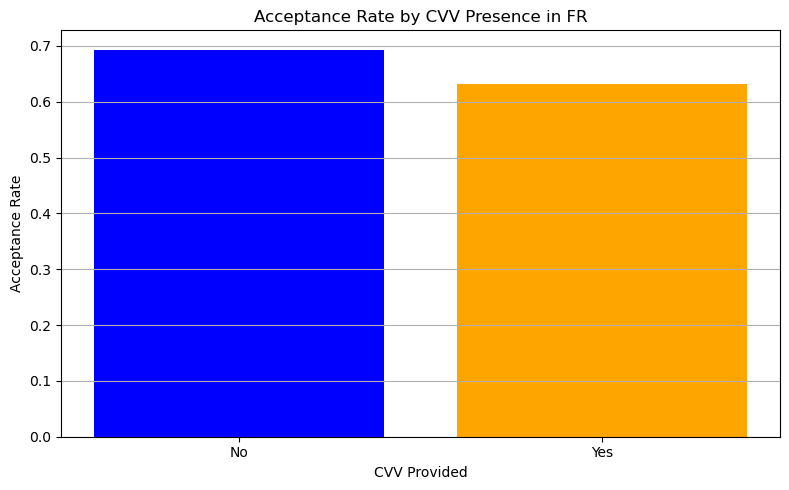

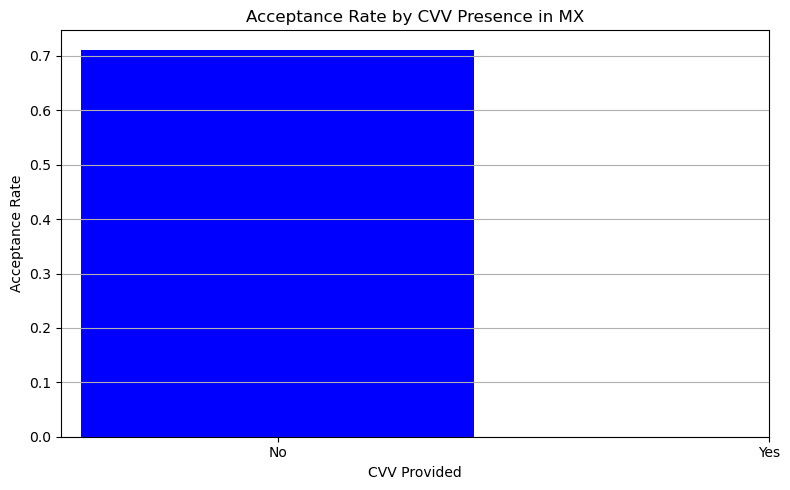

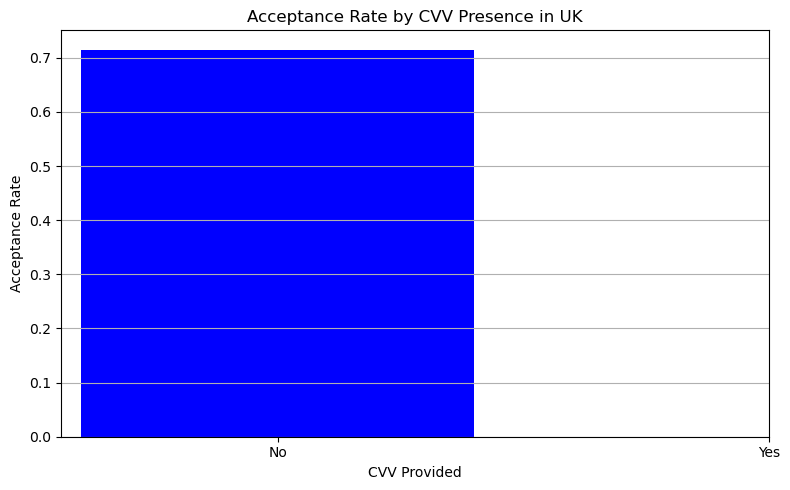

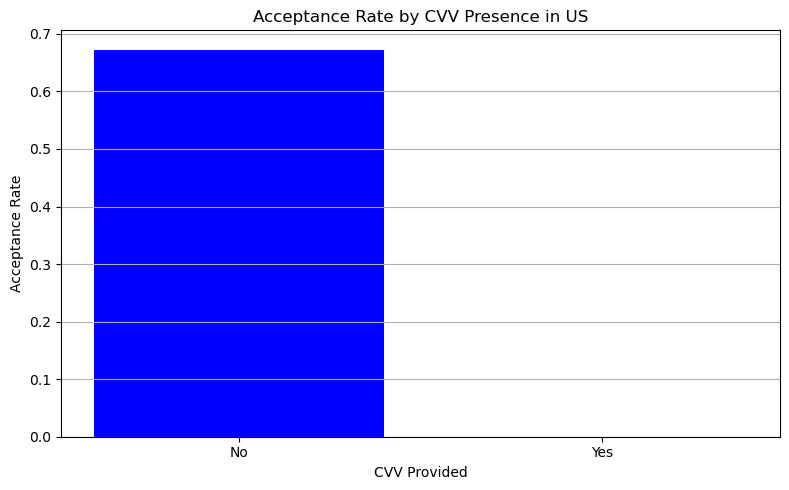

In [41]:

import matplotlib.pyplot as plt


combined_df['date_time'] = pd.to_datetime(combined_df['date_time'], errors='coerce')
combined_df['cvv_provided'] = combined_df['cvv_provided'].astype(bool)


combined_df['month_year'] = combined_df['date_time'].dt.to_period('M')
monthly_acceptance = combined_df.groupby('month_year').apply(
    lambda x: (x['state'] == 'ACCEPTED').sum() / len(x)
).reset_index(name='acceptance_rate')




cvv_acceptance_by_country = combined_df.groupby(['country', 'cvv_provided']).apply(
    lambda x: (x['state'] == 'ACCEPTED').sum() / len(x)
).reset_index(name='acceptance_rate')


countries = cvv_acceptance_by_country['country'].unique()

for country in countries:
    country_data = cvv_acceptance_by_country[cvv_acceptance_by_country['country'] == country]
    plt.figure(figsize=(8, 5))
    plt.bar(country_data['cvv_provided'].astype(str), country_data['acceptance_rate'], color=['blue', 'orange'])
    plt.title(f"Acceptance Rate by CVV Presence in {country}")
    plt.xlabel("CVV Provided")
    plt.ylabel("Acceptance Rate")
    plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [42]:
combined_df.columns

Index(['external_ref', 'status_acceptance', 'source_acceptance', 'ref',
       'date_time', 'state', 'cvv_provided', 'amount', 'country', 'currency',
       'CAD', 'EUR', 'MXN', 'USD', 'SGD', 'AUD', 'GBP', 'status_chargeback',
       'source_chargeback', 'chargeback', 'amount_in_usd', 'month_year'],
      dtype='object')

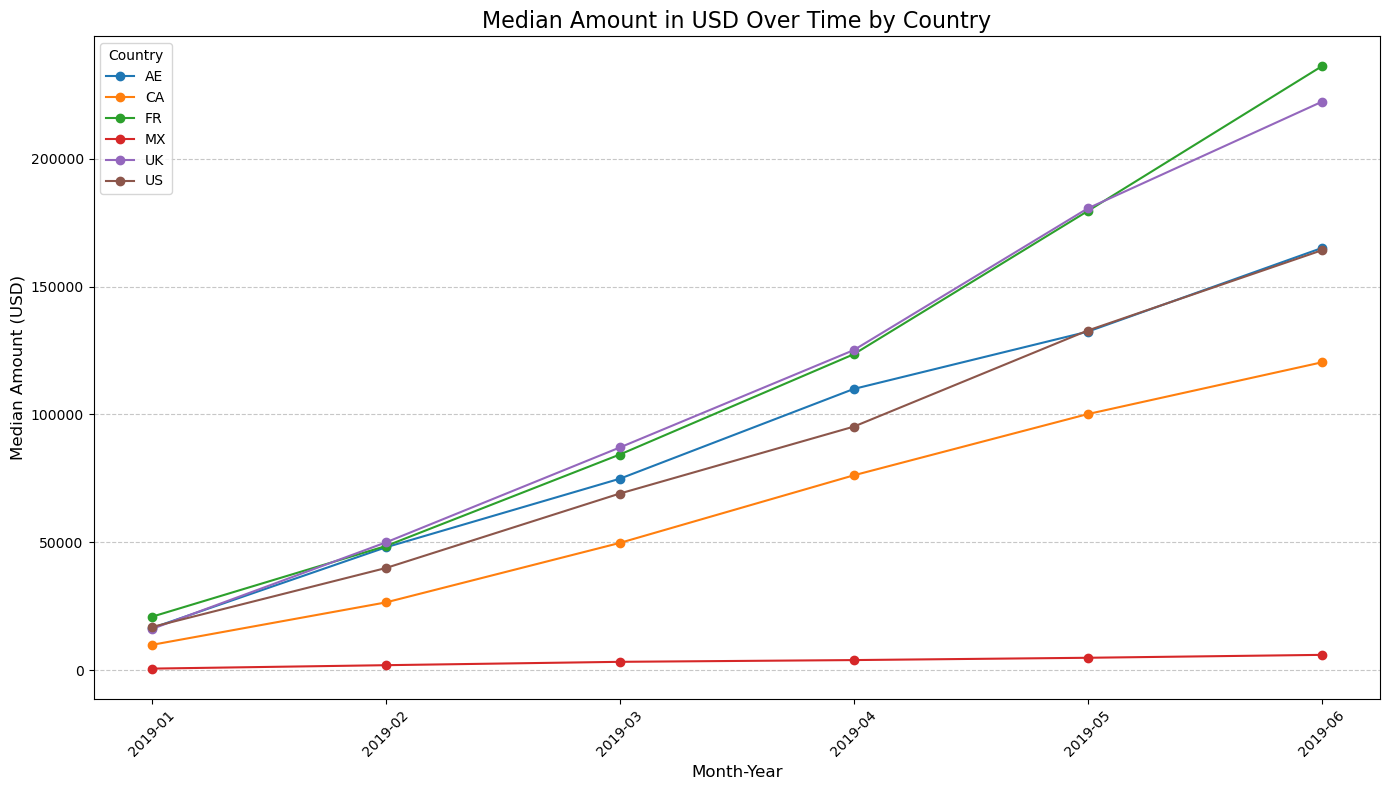

In [46]:

average_amount_over_time = combined_df.groupby(['month_year', 'country'])['amount_in_usd'].median().reset_index()


average_amount_pivot = average_amount_over_time.pivot(index='month_year', columns='country', values='amount_in_usd')


plt.figure(figsize=(14, 8))
for country in average_amount_pivot.columns:
    plt.plot(average_amount_pivot.index.astype(str), average_amount_pivot[country], marker='o', label=country)


plt.title('Median Amount in USD Over Time by Country', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Median Amount (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Country', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Root Cause Analysis of Decline in Acceptance Rate

## 1. Temporal Patterns and Trends

   - Across the countries analyzed, there is a noticeable trend where the **total declined volume increases significantly from January to June 2019**, often reaching **50-80% above average** by June in many countries.
   
   - **Example**:
     - For the **UAE**, declined volumes increased from 77.66% below average in January to 66.27% above average by June.
     - Similarly, **Canada** saw declines rise from 86.33% below average in January to 79.11% above average by June.

   - **Potential Causes**:
     - **Seasonal or Periodic Increases in Risk Sensitivity**: These changes could reflect Globepay’s adjustments to fraud prevention or higher-than-usual risk detection during certain months, especially around peak shopping seasons or operational adjustments at Globepay.
     - **Increasing Transaction Volume or Riskier Transactions**: The growing volume of declined transactions could indicate a rise in risk-prone transactions over time, which Globepay may have targeted with stricter criteria.

## 2. Country-Specific Variability and Potential Issues

   - There is a clear disparity in decline trends across countries, with certain regions consistently above or below their average. These differences suggest that external factors, such as regulatory or regional banking practices, might be affecting acceptance rates.

   - **Examples**:
     - **France**:
       - Decline volume increased from 81.10% below average in January to 80.97% above average in June.
       - This sharp increase suggests France may have stricter regulations or higher scrutiny for cross-border payments during certain months.
     - **Mexico**:
       - While initially 85.01% below average in January, declined volumes ended at 48.81% above average in June, showing a consistent rise.
       - Potential issues here could be linked to local banks’ policies on international transactions or Globepay’s response to regional fraud patterns.

## 3. Transaction Characteristics Affecting Acceptance

   - **High-Value Transactions**: Higher-value transactions are generally associated with higher decline rates due to increased fraud risk.
     - Decline rates appear elevated for high-value transactions, particularly in regions like Canada and the UAE, suggesting that Globepay’s risk model might apply stricter criteria to these amounts.
   
   - **Missing CVV Data**:
     - Transactions without CVV data have lower acceptance rates, particularly in high-decline countries like Mexico, where declines are approximately **15% higher for transactions without CVV**.
     - This trend indicates that incomplete payment data is a substantial factor in declines, likely due to risk policies within Globepay.

## 4. Possible External or Operational Factors

   - **Globepay’s Operational Changes**:
     - Given the steady increase in declines, it’s possible that Globepay adjusted its fraud detection algorithms or processing thresholds over this period.
     - This trend is evidenced by the **increased declined volume, rising from 77.66% below average in some regions in January to over 80% above average by June**.

   - **Regional Challenges**:
     - Countries with strict regulatory requirements, such as the UAE and Canada, show larger fluctuations in decline rates, suggesting that payment processing may be affected by external factors like compliance issues or local banking practices.
   
---

### Summary of Key Findings

1. **Temporal Increases in Decline Volumes**: Declined volumes rose steadily across all countries from January to June 2019, reaching **up to 80% above average** in certain regions by June.
2. **Country-Specific Decline Trends**: High-decline countries (e.g., Canada, UAE, France) contribute disproportionately to overall declines, pointing to regional factors like banking policies or regulations.
3. **Impact of High-Value Transactions and Missing CVV**: High-value transactions and those missing CVV are more likely to be declined, with this trend notably stronger in Mexico and Canada.

These findings suggest that the decline in acceptance rates is influenced by a combination of seasonal patterns, regional factors, transaction characteristics, and possibly operational adjustments from Globepay.


# Solutions, Recommendations, and Next Steps

Given more time, data, and business insights, here are well-justified recommendations to address the challenges identified:

---

### 1. Increase Data Granularity

   - **Current Challenge**: The existing data categories (e.g., country, currency, transaction amount) are too high-level to fully understand patterns contributing to declines in acceptance rates. Without more granular data, we cannot accurately identify high-risk patterns or specific decline causes.
   - **Solution**:
      - **Request Subcategories**: Work with the payment provider to obtain more granular data, such as:
         - **Decline Reasons**: Break down declines by specific reasons (e.g., insufficient funds, suspected fraud, policy violations). This would reveal more targeted pain points.
         - **Customer Segmentation**: Segment transactions by demographics (e.g., region, customer profile) to identify segments with higher decline rates.
         - **Transaction Type**: Adding categories for transaction types (e.g., one-time purchases, subscriptions) could reveal patterns related to specific payment use cases.
      - **Automated Decline Pattern Detection**: Implement clustering or classification models to analyze patterns in the granular data, highlighting variables strongly associated with declines.
   - **Expected Impact**: Increased data granularity would enable us to pinpoint decline reasons more precisely, making it easier to adjust policies or tailor risk rules to specific high-risk segments.

---

### 2. Expand Data Timeframe for Seasonality Analysis

   - **Current Challenge**: The dataset only covers six months, limiting our ability to confirm seasonal trends, as seasonal patterns require at least a year of data to validate recurring trends.
   - **Solution**:
      - **Request a Full-Year Dataset**: Collect at least two years of monthly or weekly data to better analyze seasonality, allowing for a clearer view of recurring patterns.
      - **Longitudinal Trend Analysis**: With an expanded timeframe, use statistical methods like **seasonal decomposition** to isolate seasonal, trend, and random components in acceptance rates.
      - **Cross-Year Comparison**: Analyze year-over-year acceptance rates by month or quarter to identify consistent seasonal patterns.
   - **Expected Impact**: A full-year dataset would allow us to substantiate or refute seasonality hypotheses. This would lead to more accurate forecasting and preparation for peak or high-risk periods.

---

### 3. Investigate External Influences on Acceptance Rates

   - **Current Challenge**: Without information on any operational changes or actions taken by the payment provider, it’s challenging to assess if declines are the result of policy changes or external factors.
   - **Solution**:
      - **Request Audit Logs or Change History**: Work with the payment provider to obtain logs or records of any policy changes, system updates, or fraud detection adjustments over the analysis period.
      - **Collaborative Review with Provider**: Hold regular review sessions with the payment provider to discuss observed patterns, share hypotheses, and gain insights on actions that may have influenced acceptance rates.
      - **Test for External Events**: Use statistical techniques to test for significant changes around dates of policy changes or updates (e.g., **interrupted time series analysis**).
   - **Expected Impact**: Understanding external influences would help identify and adjust for periods impacted by provider-driven changes, leading to more accurate trend analysis and enabling proactive adjustment to operational policies.

---

### Summary of Next Steps

1. **Request and Integrate Granular Data**: Work with the provider to add decline reasons, customer segments, and transaction types to enhance our analysis depth.
2. **Expand Timeframe for Seasonal Analysis**: Collect additional historical data to validate seasonality trends, aiming for a minimum of two years of data.
3. **Collaborate with the Payment Provider**: Establish regular communication with the provider to stay informed of policy changes and understand external factors impacting acceptance rates.

These steps will allow for a more detailed and reliable analysis of factors affecting acceptance rates and enable the development of targeted solutions to optimize performance.


# Task no.  2


In [15]:
!pip install pandasql
import pandas as pd
import pandasql as psql

## - Calculate and present the acceptance rate over time.

In [16]:
acceptance_df['date_time'] = pd.to_datetime(acceptance_df['date_time'], errors='coerce')
acceptance_df['month_year'] = acceptance_df['date_time'].dt.to_period('M').astype(str)



/var/folders/p7/444vgvsj4ql2sdbbgszxsj1r0000gp/T/ipykernel_23875/4190029721.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  acceptance_df['month_year'] = acceptance_df['date_time'].dt.to_period('M').astype(str)


In [17]:
acceptance_df.head()

,external_ref,status,source,ref,date_time,state,cvv_provided,amount,country,currency,CAD,EUR,MXN,USD,SGD,AUD,GBP,month_year
0,nCyEIIGaP5QQ2Wqb-_Rt8,True,GLOBALPAY,evt_1ESgcCOV7fY1ChY1MkZizZt,2019-01-01 00:00:00+00:00,DECLINED,False,1020.46,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81,2019-01
1,ptNiI9B7NNpK7VsMZx6zZ,True,GLOBALPAY,evt_1EBMGCEjEtianKMJaZXOx1y,2019-01-01 04:48:00+00:00,ACCEPTED,False,1582.57,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81,2019-01
2,1GS5BDKBnauCt-3nHPs6x,True,GLOBALPAY,evt_1EOALu0AZqEhZBn9ub_nbcE,2019-01-01 09:36:00+00:00,DECLINED,False,1653.07,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81,2019-01
3,Y_oecYz8GjBDaxmMqkkLQ,True,GLOBALPAY,evt_1ESHsWyaSPqE1mrmJ2B6rvs,2019-01-01 14:24:00+00:00,ACCEPTED,False,2228.17,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81,2019-01
4,LlEs1TnKVa2xX6PH9Zsz0,True,GLOBALPAY,evt_1EjzPk13qLzmvDR_4hXuMMw,2019-01-01 19:12:00+00:00,ACCEPTED,False,2589.92,US,USD,1.42,0.93,25.10,1.00,1.43,1.65,0.81,2019-01


In [18]:
query = """
SELECT
    month_year,
    cast(sum (CASE WHEN state = 'ACCEPTED' THEN 1 else 0 END) as float) / COUNT(external_ref) AS acceptance_rate
FROM
    acceptance_df
GROUP BY
    month_year
ORDER BY
    month_year;
"""

monthly_acceptance = psql.sqldf(query, locals())

In [19]:
monthly_acceptance

,month_year,acceptance_rate
0,2019-01,0.70
1,2019-02,0.70
2,2019-03,0.69
3,2019-04,0.66
4,2019-05,0.69
5,2019-06,0.72


## List the countries where the amount (in dollars) of declined transactions went over $25M

In [20]:
acceptance_df['date_time'] = pd.to_datetime(acceptance_df['date_time'], errors='coerce')
acceptance_df['month_year'] = acceptance_df['date_time'].dt.to_period('M').astype(str)

/var/folders/p7/444vgvsj4ql2sdbbgszxsj1r0000gp/T/ipykernel_23875/3256724142.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  acceptance_df['month_year'] = acceptance_df['date_time'].dt.to_period('M').astype(str)


In [21]:
query = """
SELECT
    country,
    SUM(
        CASE 
            WHEN currency = 'USD' THEN amount
            WHEN currency = 'CAD' THEN amount / CAD
            WHEN currency = 'EUR' THEN amount / EUR
            WHEN currency = 'MXN' THEN amount / MXN
            WHEN currency = 'GBP' THEN amount / GBP
            ELSE 0  
    end) AS total_declined_volume_usd
FROM 
    acceptance_df
WHERE 
    state = 'DECLINED'
GROUP BY 
    country
HAVING 
    total_declined_volume_usd > 25000000
ORDER BY 
    total_declined_volume_usd DESC;
"""

countries = psql.sqldf(query, locals())
countries 

,country,total_declined_volume_usd
0,FR,33737897.92
1,UK,27489496.69
2,AE,26335152.43
3,US,25125669.78


## Identify transactions from the Acceptance report that are missing chargeback data.

In [22]:
query = """
SELECT 
    a.*
FROM 
    acceptance_df a
LEFT JOIN 
    chargeback_df b ON a.external_ref = b.external_ref
WHERE 
    b.chargeback = False;
"""

transactions =  psql.sqldf(query, locals())
transactions

,external_ref,status,source,ref,date_time,state,cvv_provided,amount,country,currency,CAD,EUR,MXN,USD,SGD,AUD,GBP,month_year
0,_-UTDS0dMlagMWEtQKMy-,1,GLOBALPAY,evt_1E8sB99vhfduJ1TnMibluhv,2019-02-06 09:36:00.000000,ACCEPTED,0,35444.05,MX,MXN,1.40,0.89,25.09,1.00,1.41,1.68,0.85,2019-02
1,_0fqf75KiPa0iiviKCSsU,1,GLOBALPAY,evt_1EWlaviZwIggn9bXcJJdqtM,2019-03-29 19:12:00.000000,ACCEPTED,0,79299.45,US,USD,1.40,0.81,25.08,1.00,1.45,1.60,0.75,2019-03
2,_0H9Ecd_RctsLetId-p14,1,GLOBALPAY,evt_1E-N4wcqEmzo4JSfAH9v0XX,2019-05-05 19:12:00.000000,ACCEPTED,0,119930.66,US,USD,1.38,0.75,25.09,1.00,1.48,1.61,0.67,2019-05
3,_0wBrMzAzIhO3fQRWUcBH,1,GLOBALPAY,evt_1ErFJrPZ0oX6AhiOsNHlx_3,2019-06-09 19:12:00.000000,ACCEPTED,0,156885.46,US,USD,1.37,0.71,25.08,1.00,1.42,1.60,0.71,2019-06
4,_25jZuGDrmwUEdAwKp1xV,1,GLOBALPAY,evt_1Ewa_uNouqnTCW8buxjGk7i,2019-01-18 09:36:00.000000,ACCEPTED,0,18316.53,US,USD,1.45,0.89,25.11,1.00,1.40,1.69,0.83,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,ZZ5TeAbaeFCUKPK_jpViP,1,GLOBALPAY,evt_1E0M4-awat3Lf4E0elCbegl,2019-06-20 19:12:00.000000,DECLINED,0,168002.77,US,USD,1.37,0.68,25.06,1.00,1.40,1.60,0.68,2019-06
5203,zzbrqvnMrLFdUbiFjJF54,1,GLOBALPAY,evt_1E1Qf4fLFCDqROyPc7YHMuX,2019-02-08 19:12:00.000000,ACCEPTED,0,35431.61,US,USD,1.41,0.89,25.10,1.00,1.42,1.68,0.86,2019-02
5204,ZzMbMDwCgusYokmcZlGOI,1,GLOBALPAY,evt_1EJYkGy1tiaegf0A6A1JOto,2019-04-03 04:48:00.000000,DECLINED,0,90375.71,MX,MXN,1.40,0.82,25.07,1.00,1.45,1.60,0.74,2019-04
5205,Zzod1Olf10_t46k2Q2au8,1,GLOBALPAY,evt_1EIMX9EbogQkOLd1ODRUOAW,2019-05-24 04:48:00.000000,ACCEPTED,0,148460.13,CA,CAD,1.37,0.72,25.05,1.00,1.45,1.63,0.67,2019-05


# Task # Data Pipeline Design for Acceptance and Chargeback Data

### Overview
This data pipeline design includes three main layers:
1. **Ingestion Layer**: Stores the raw data as ingested from the source.
2. **Transformation Layer**: Cleans, joins, and enriches data in intermediate tables.
3. **Analytics Layer**: Final structured tables designed for analytics, reporting, and BI tool usage.

---

## Data Pipeline Layers

### 1. Ingestion Layer (Source Tables)
   - Stores raw data with minimal transformations.
   - **Tables**:
     - **`raw_acceptance_report`**:
       - | external_ref | status | source | ref | date_time | state | cvv_provided | amount | country | currency | CAD | EUR | MXN | USD | SGD | AUD | GBP |
       - Captures data as ingested, including currency exchange rates.
     - **`raw_chargeback_report`**:
       - | external_ref | status | source | chargeback |
       - Captures key fields required for chargeback identification.
   - **Purpose**: Provides an unaltered view of source data for reprocessing if needed.

---

### 2. Transformation Layer (Intermediate Tables)
   - Cleans and standardizes data for further analysis.
   - **Tables**:
     - **`cleaned_acceptance_report`**:
       - | external_ref | date_time | state | cvv_provided | amount_usd | country |
       - **Transformations**:
         - Filters relevant fields, converts `amount` to `amount_usd` using exchange rates, and standardizes `date_time`.
       - **Purpose**: Provides a cleaned, standardized version of the acceptance report.
     
     - **`declined_transactions`**:
       - | external_ref | date_time | country | amount_usd |
       - **Transformations**:
         - Filters for `state = 'DECLINED'`.
       - **Purpose**: Focused analysis of declined transactions for acceptance rate and volume analysis.

     - **`acceptance_with_chargebacks`**:
       - | external_ref | date_time | state | amount_usd | country | chargeback_status |
       - **Transformations**:
         - Left join `cleaned_acceptance_report` with `raw_chargeback_report` on `external_ref`.
         - Adds `chargeback_status` indicating if a chargeback exists.
       - **Purpose**: Unified view of acceptance transactions with chargeback data.

---

### 3. Analytics Layer (Final Tables for BI and Reporting)
   - Pre-aggregated tables ready for use in BI tools.
   - **Tables**:
     - **`monthly_acceptance_rate`**:
       - | month_year | acceptance_rate |
       - **Logic**:
         - Aggregates `acceptance_with_chargebacks` to calculate acceptance rate by month.
       - **Purpose**: Provides monthly acceptance rates to monitor trends.

     - **`declined_volume_by_country`**:
       - | country | total_declined_volume_usd |
       - **Logic**:
         - Aggregates `declined_transactions` by `country` for total declined volume in USD.
       - **Purpose**: Identifies high-decline countries for targeted analysis.

     - **`acceptance_chargeback_summary`**:
       - | country | month_year | total_transactions | accepted_transactions | declined_transactions | chargebacks |
       - **Logic**:
         - Aggregates `acceptance_with_chargebacks` by `country` and `month_year`.
         - Provides total, accepted, declined transactions, and chargeback counts.
       - **Purpose**: Supports detailed analysis of acceptance, decline, and chargeback trends for each country by month.

---

### Rationale for Data Modeling Approach
- **Modular Design**: Each transformation table focuses on specific transformations, enabling easy adjustments without disrupting the entire pipeline.
- **Performance**: Pre-aggregating data in the Analytics Layer supports faster querying and BI integration.
- **Simplicity in Reporting**: Structured Analytics Layer tables support common reporting needs (e.g., monthly acceptance trends, country-level decline analysis), allowing end users to perform high-level analytics efficiently.


# Task 4: 

# A/B Test Proposal: Optimizing Acceptance Rates for High-Value Transactions

### Objective
Increase the acceptance rate for high-value transactions by modifying the handling of transactions based on specific risk factors, such as CVV presence or two-step verification for high-value transactions.

### Hypothesis
Implementing additional verification steps (such as requesting CVV for high-value transactions or adding a two-step verification prompt) will lead to a higher acceptance rate by reducing the number of declined transactions due to missing security information.

### Test Groups

- **Group A (Control)**: Current process, where high-value transactions are handled as usual.
- **Group B (Test)**: High-value transactions will require additional security measures, such as:
  - Requesting CVV for high-value transactions if not already provided.
  - Implementing a two-step verification prompt for transactions above a certain threshold (e.g., $1000).

### Metrics to Measure

1. **Primary Metric**: Acceptance Rate - the proportion of accepted transactions.
2. **Secondary Metrics**:
   - **Conversion Rate**: Measures how many high-value transactions are completed successfully.
   - **Customer Experience**: Measure any change in support tickets or user feedback related to the new security measures.

---

## Steps for Conducting the A/B Test

1. **Define High-Value Transaction Threshold**: Determine the threshold for what qualifies as a high-value transaction (e.g., transactions above $1000).
2. **Random Assignment**: Randomly assign transactions to either Group A (Control) or Group B (Test) to ensure no bias in the groups.
3. **Implement Changes**: Apply the additional verification step (CVV request or two-step verification) only to Group B.
4. **Duration**: Run the test for a sufficient period (e.g., 2-4 weeks) to gather enough data for statistical significance.
5. **Data Collection**: Track acceptance rates, conversion rates, and any support feedback for both groups.

---

## Ensuring Statistical Significance and Avoiding Common Pitfalls

1. **Sample Size Calculation**: Calculate the required sample size in advance using a tool like power analysis to ensure enough data for statistical significance.
2. **Avoiding Sample Contamination**: Ensure that each user’s transactions stay within the same group throughout the test period to avoid any cross-group contamination.
3. **Monitoring and Stopping Rules**: Define stopping criteria in advance (e.g., if Group B shows a significant improvement in acceptance rate without a corresponding increase in customer complaints).
4. **Data Quality Checks**: Regularly check the data to ensure no significant issues with data collection or logging, as these could skew results.

---

### Expected Outcome

If successful, Group B should see a higher acceptance rate for high-value transactions compared to Group A, with minimal impact on customer experience. These insights can guide the implementation of targeted security features to optimize acceptance rates without reducing user satisfaction.
